< [Classification Analysis](7-Classification_Analysis.ipynb) | [Contents](0-Index.ipynb) | [Application]() >

# 8  Análise de Agrupamento

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](http://colab.research.google.com/github/computational-chemical-biology/DataScience/blob/master/8-Cluster_Analysis.ipynb)

 <a id="top"></a> <br>
**Conteúdo do *Notebook***
1. [Introdução à Análise de Agrupamento](#1)
2. [Análise de Componentes Principais](#2)
3. [Análise de Agrupamento Hierárquico](#3)
4. [Referências](#4)

<a id="1"></a> <br>
# 1 - Introdução à Análise de Agrupamento

Um ser inteligente não pode tratar todos os objetos que vê como uma entidade única, diferentes de tudo
mais no universo. Ele tem que colocar objetos em categorias, para que possa aplicar conhecimento sobre objetos semelhantes encontrados no passado, para o objeto em questão.
<div align="right">
  Steven Pinker, How the Mind Works, 1997
</div>

A seguir, iremos praticar um método de redução da dimensionalidade e um método de agrupamento, utilizando conceitos de programação e de acesso a bibliotecas externas, como visto anteriormente <cite data-cite="236589/K92N4SRW"></cite>.

<a id="2"></a> <br>
# 2 - Análise de Componentes Principais

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

Para ter um intuição da transformação produzida pelo PCA, analisaremos um conjunto de observações simuladas em duas dimensões <cite data-cite="236589/R4D47YI3"></cite>.

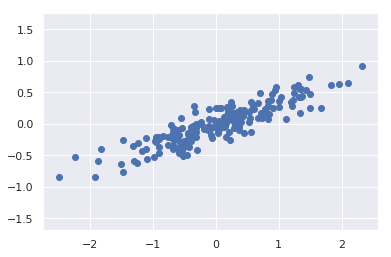

In [14]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [16]:
print(pca.components_) # lembre-se dos atributos seguidos por _

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [17]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


Para compreender a projeção ajustada pela Análise de Componentes Principais, vamos visualizar as projeções como vetores sobre os dados originais, utilizando os 'componentes' para definir a direção dos vetores, e a variância explicada para definir o tamanho dos vetores.

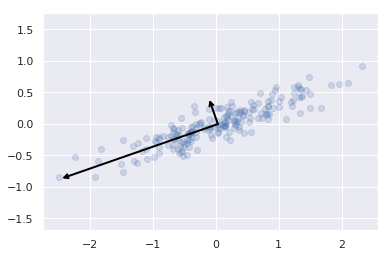

In [18]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0, color='black')
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

[(-2, 2.1),
 (-2, 2),

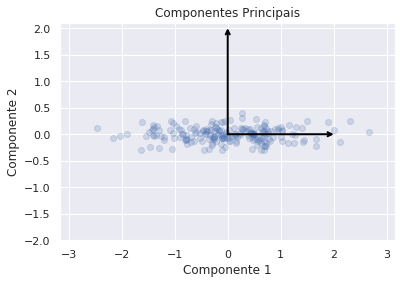

In [30]:
# plot Componentes Principais
fig, ax = plt.subplots(1, 1)
X_pca = pca.transform(X)
ax.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.2)
draw_vector([0, 0], [0, 2], ax=ax)
draw_vector([0, 0], [2, 0], ax=ax)
ax.axis('equal')
ax.set(xlabel='Componente 1', ylabel='Componente 2',
          title='Componentes Principais',
          xlim=(-2, 2), ylim=(-2, 2.1))

Utilizaremos novamente o conjunto de dados da Iris para executar o PCA.

In [8]:
iris = sns.load_dataset('iris') # carrega o conjunto de dados
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


A Análise de Componentes principais é afetada pela diferença na escala das características <cite data-cite="236589/Y76R5XV4"></cite>. Portanto, o re-escalonamento dos dados antes da execução do PCA é recomendada. Utilizaremos a função `StandardScaler` do pacore sklearn para executar o escalonamento.

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

caracteristicas = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
# Separando as características, como visto anteriormente
x = iris.loc[:, caracteristicas].values

# Separando as espécies como visto anteriormente
y = iris['species'].values
enc = LabelEncoder()
label_encoder = enc.fit(y)
y = label_encoder.transform(y) + 1

# Escalonando as características
x = StandardScaler().fit_transform(x)

x[:5,:]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

Na seção anterior utilizamos a Análise de Discriminante Linear para projetar os dados nas dimensões que melhor separavam as classes de interesse. Nesta seção faremos uma projeção, desta vez de forma *não supervisionada*, pois não levaremos em conta os rótulos das categorias. Faremos a projeção na direção que maximiza a variância e visualizaremos a projeção em duas dimensões.

In [10]:
from sklearn.decomposition import PCA
import pandas as pd

pca = PCA(n_components=2)
componentes_principais = pca.fit_transform(x)
df_principal = pd.DataFrame(data = componentes_principais
             , columns = ['componente principal 1', 'componente principal 2'])

df_principal.head()

,componente principal 1,componente principal 2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


In [11]:
df_final = pd.concat([df_principal, iris['species']], axis = 1)
df_final.head()

,componente principal 1,componente principal 2,species
0,-2.264703,0.480027,setosa
1,-2.080961,-0.674134,setosa
2,-2.364229,-0.341908,setosa
3,-2.299384,-0.597395,setosa
4,-2.389842,0.646835,setosa


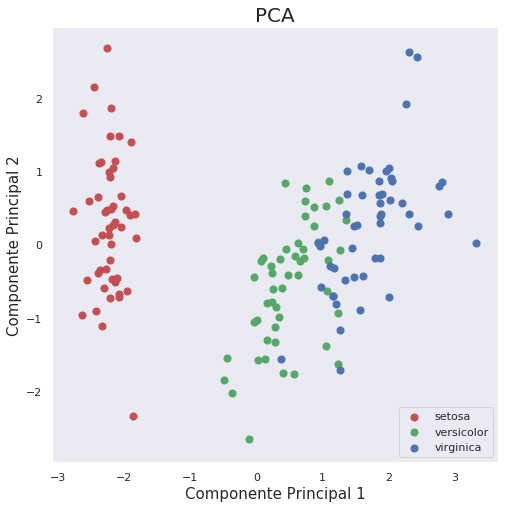

In [12]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Componente Principal 1', fontsize = 15)
ax.set_ylabel('Componente Principal 2', fontsize = 15)
ax.set_title('PCA', fontsize = 20)
targets = ['setosa', 'versicolor', 'virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = df_final['species'] == target
    ax.scatter(df_final.loc[indicesToKeep, 'componente principal 1']
               , df_final.loc[indicesToKeep, 'componente principal 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

Inspecionando a variância explicada, podemos observar que o primeiro componente explica 72.96% da variância e o segundo 22.85% da variância. Juntos, os dois explicam 95.81% da variância dos dados.

In [13]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

<a id="3"></a> <br>
# 3 - Análise de agrupamento hierárquico

Em uma análise de agrupamento hierárquico os dados são
agrupados em uma série de etapas. Entre os métodos aglomerativos, o método introduzido por Ward (1963) é um dos métodos mais populares. O objetivo do método Ward, em cada etapa de agrupamento, é minimizar a soma de erros dentro do agrupamento <cite data-cite="236589/K92N4SRW"></cite>.

A seguir, utilizamos a matriz *x* com os dados da Iris normalizados, para criar agrupamentos hierárquicos. É importante que os usuarios tentem mudar os métodos de distância e agrupamento e observar o impacto na separação dos grupos.

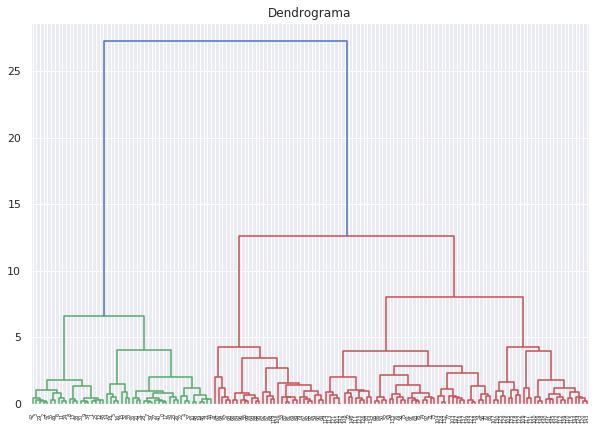

In [66]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograma")  
dend = shc.dendrogram(shc.linkage(x, method='ward'))

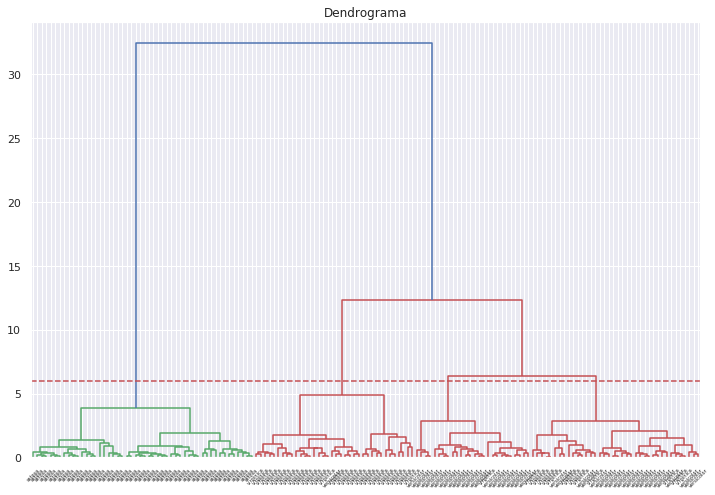

In [88]:
# Note que o agrupamento difere do realizado acima,
# pois os dados não estão escalonados aqui
plt.figure(figsize=(12, 8))  
plt.title("Dendrograma")  
dend = shc.dendrogram(shc.linkage(iris.iloc[:,:4], method='ward'), 
                      labels=iris['species'].to_numpy(), leaf_rotation=45.0, 
                      leaf_font_size=5)
plt.axhline(y=6, color='r', linestyle='--')

In [68]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster.fit_predict(x)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2, 0,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [69]:
lista_col = [{0:'blue', 1:'red', 2:'green'}[x] for x in cluster.labels_]

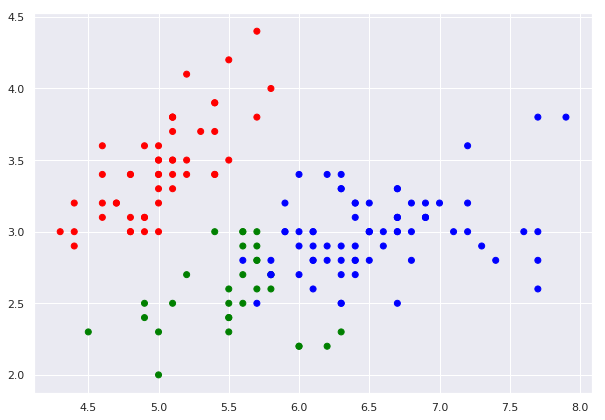

In [70]:
plt.figure(figsize=(10, 7))  
plt.scatter(iris['sepal_length'], iris['sepal_width'], c=lista_col) 

In [71]:
# Carregando dados de um link na internet
url = 'https://python-graph-gallery.com/wp-content/uploads/mtcars.csv'
df = pd.read_csv(url)
df = df.set_index('model')
df

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
model,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2


In [72]:
minha_paleta = dict(zip(df.cyl.unique(), ["orange","yellow","brown"]))
cores_linhas = df.cyl.map(minha_paleta)

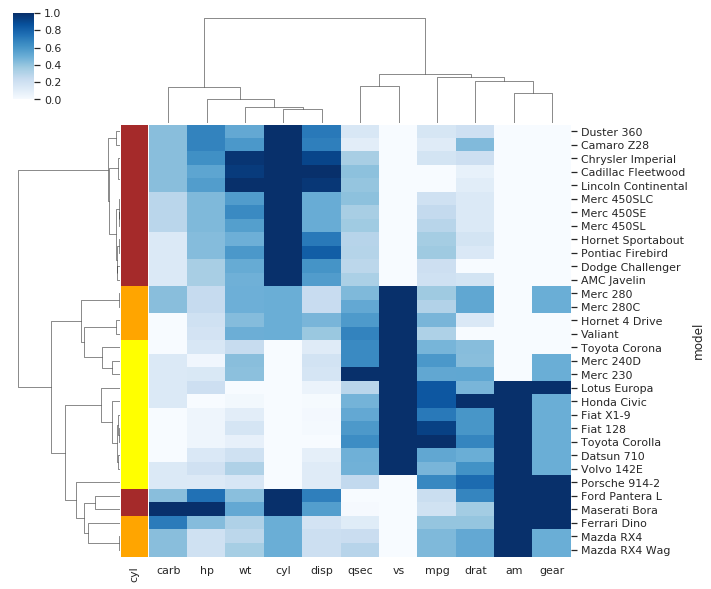

In [73]:
# Criar mapa de calor e dendrograma
sns.clustermap(df, metric="correlation", method="single", 
               cmap="Blues", standard_scale=1, row_colors=cores_linhas)

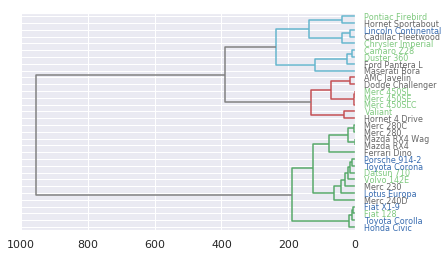

In [74]:
# https://python-graph-gallery.com/
# 
from scipy.cluster.hierarchy import dendrogram, linkage

# Calcular a distância entre os objetos 
Z = linkage(df, 'ward')
 
# Construir um dendrograma
dendrogram(Z, labels=df.index, leaf_rotation=0, 
           orientation="left", color_threshold=240, above_threshold_color='grey')
 
# Criar uma paleta com 3 cores para 3 possibilidades de cyl
minha_paleta = plt.cm.get_cmap("Accent", 3)
 
# Transformar  a coluna 'cyl' em uma variável categórica. 
# Isso irá permitir associar uma cor a cada nível.
df['cyl'] = pd.Categorical(df['cyl'])
minhas_cores = df['cyl'].cat.codes
 
# Aplicar as cores para cada rótulo
ax = plt.gca()
xlbls = ax.get_ymajorticklabels()
num=-1
for lbl in xlbls:
    num += 1
    val = minhas_cores[num]
    lbl.set_color(minha_paleta(val))


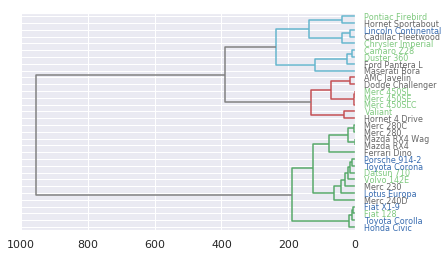

In [75]:
# Salvando gráficos para pdf
from matplotlib.backends.backend_pdf import PdfPages

with PdfPages('dendrograma.pdf') as pdf:
    # Construir um dendrograma
    dendrogram(Z, labels=df.index, leaf_rotation=0, 
               orientation="left", color_threshold=240, above_threshold_color='grey')
    # Aplicar as cores para cada rótulo
    ax = plt.gca()
    xlbls = ax.get_ymajorticklabels()
    num=-1
    for lbl in xlbls:
        num += 1
        val = minhas_cores[num]
        lbl.set_color(minha_paleta(val))
    pdf.savefig()

<a id="4"></a> <br>
# 4 - Referências

<div class="cite2c-biblio"></div>

###### [Voltar ao topo](#top)

<!--NAVIGATION-->
< [Classification Analysis](7-Classification_Analysis.ipynb) | [Contents](0-Index.ipynb) | [Application]() >